In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading Titanic dataset
df = pd.read_csv(r"titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#to check how many rows of columns has null or nan value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

In [5]:
#removing all the rows having null value.
df.dropna(inplace = True)
df.shape

(183, 12)

In [6]:
#Once again checking, confirmation
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
#removing duplicate value
df.drop_duplicates(keep = 'first')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
df.shape

(183, 12)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [10]:
#droping unwanted columns
df = df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
1,2,1,1,female,38.0,71.2833
3,4,1,1,female,35.0,53.1000
6,7,0,1,male,54.0,51.8625
10,11,1,3,female,4.0,16.7000
11,12,1,1,female,58.0,26.5500


In [11]:
#selecting the target variable
target = df['Survived']
target

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [12]:
#We need labelEncoder to convert Sex column into number, because our model works better with numbers
from sklearn.preprocessing import  LabelEncoder

In [13]:
#now we will convert Sex into number
l_Sex = LabelEncoder()

In [14]:
#convrting Sex into number and there itself transforming it.
df['Sex_in_number'] = l_Sex.fit_transform(df['Sex'])
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Sex_in_number
1,2,1,1,female,38.0,71.2833,0
3,4,1,1,female,35.0,53.1000,0
6,7,0,1,male,54.0,51.8625,1
10,11,1,3,female,4.0,16.7000,0
11,12,1,1,female,58.0,26.5500,0


In [15]:
#removing the another Sex column
df = df.drop(['Sex'],axis = 1)
df.head(5)

,PassengerId,Survived,Pclass,Age,Fare,Sex_in_number
1,2,1,1,38.0,71.2833,0
3,4,1,1,35.0,53.1000,0
6,7,0,1,54.0,51.8625,1
10,11,1,3,4.0,16.7000,0
11,12,1,1,58.0,26.5500,0


In [16]:
#Now, except survived columns all will work as independent variable.
df = df.drop(['Survived'],axis = 'columns')
df.head(5)

,PassengerId,Pclass,Age,Fare,Sex_in_number
1,2,1,38.0,71.2833,0
3,4,1,35.0,53.1000,0
6,7,1,54.0,51.8625,1
10,11,3,4.0,16.7000,0
11,12,1,58.0,26.5500,0


In [17]:
#Afrer all pre-processing, now its time to make model and train it.
from sklearn.model_selection import train_test_split

In [18]:
#splitting the dataset into train and test on test at 20 %
x_train , x_test, y_train, y_test = train_test_split(df,target,test_size = 0.2)

In [19]:
from sklearn import tree

In [20]:
#Decision tree classifier model
model = tree.DecisionTreeClassifier()

In [21]:
#now here training my model
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
#now predicting the y value on X_test set values
l = model.predict(x_test)
p = pd.DataFrame()
l

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
#checking the score also said to be accuracy, on x_test and y_test dataset
model.score(x_test,y_test)

0.8378378378378378

In [26]:
#taking it in dataframe to visualize
p['Value'] = l
p['Value'].value_counts()

1    32
0     5
Name: Value, dtype: int64

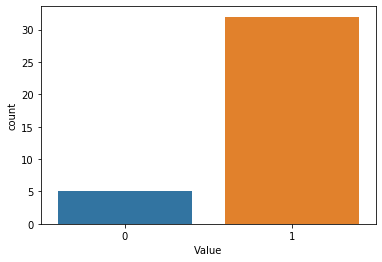

In [28]:
#This plot shows how many survived in 1, and death in 0.
sns.countplot(p['Value'])